Index(['HB', 'ta1', 'tb1', 'ta2', 'tb2', 'A1_area', 'b2', 'b1', 'age',
       'systolic_peak_index'],
      dtype='object')


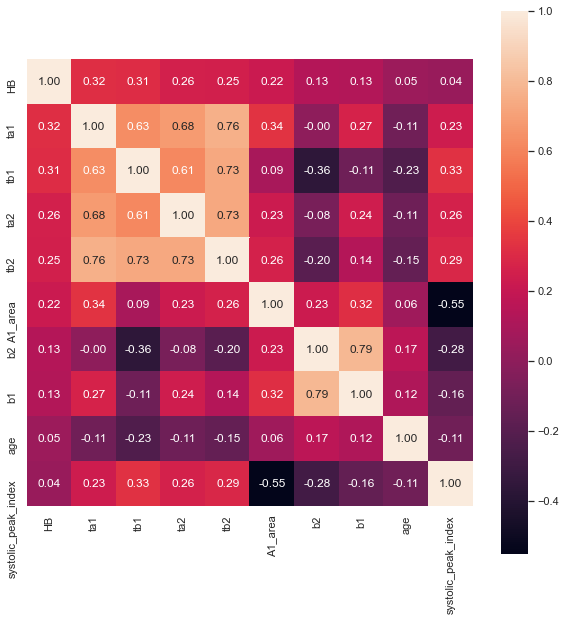

In [41]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

feats_file = 'C:/Users/numan98khan/Desktop/HemaRays/research/HemaRays_Data_OneFourth/dump/features/fiducial_points.csv'

data = pd.read_csv(feats_file)

# del data['folder_name']
data

dec_df = data['filename'].str.split("_", expand=True)

del dec_df[0]
del dec_df[2]
del dec_df[4]
del dec_df[6]
del dec_df[7]

dec_df.columns = ['gender', 'age', 'HB']

dec_df['HB'] = dec_df['HB'].str.replace("p", ".").astype('float')
dec_df['age'] = dec_df['age'].astype('int')

dec_df

final_data = pd.concat([dec_df, data], axis=1)

del final_data['filename'] 

# gender_dummies = pd.get_dummies(final_data.gender)
# final_data = pd.concat([final_data, gender_dummies], axis=1)

correlation = final_data.corr(method='pearson')
columns = correlation.nlargest(10, 'HB').index
print(columns)

correlation_map = np.corrcoef(final_data[columns].values.T)
# print(correlation_map)

sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()
# del final_data['gender'] 
# del final_data['folder_name'] 

# final_data



X = final_data[columns]
y = X['HB'].values
X = X.drop('HB', axis = 1).values

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)


c:\users\numan98khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\numan98khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\numan98khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\numan98khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


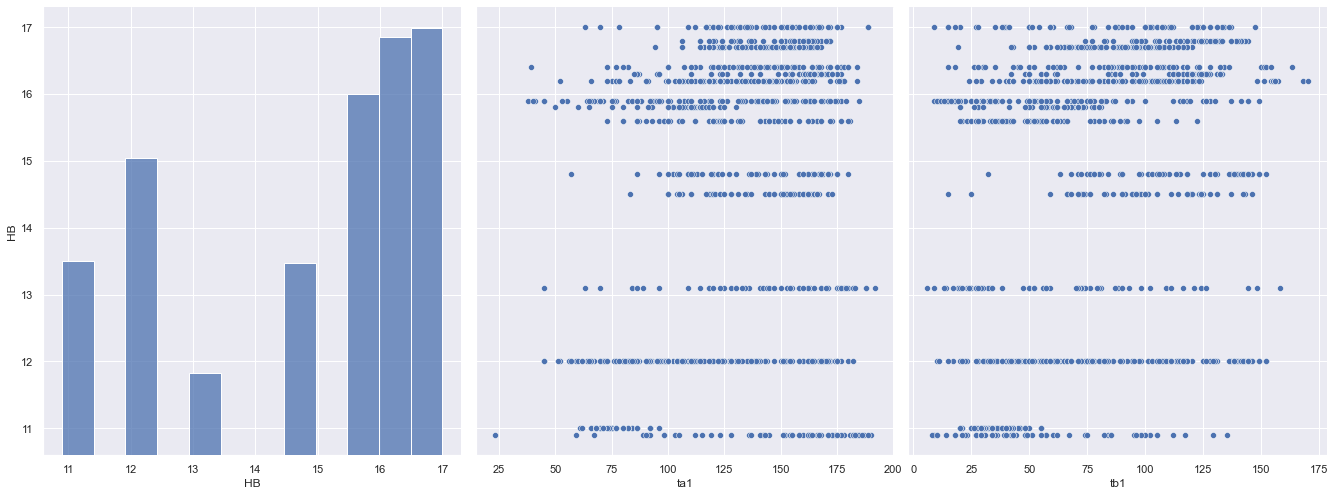

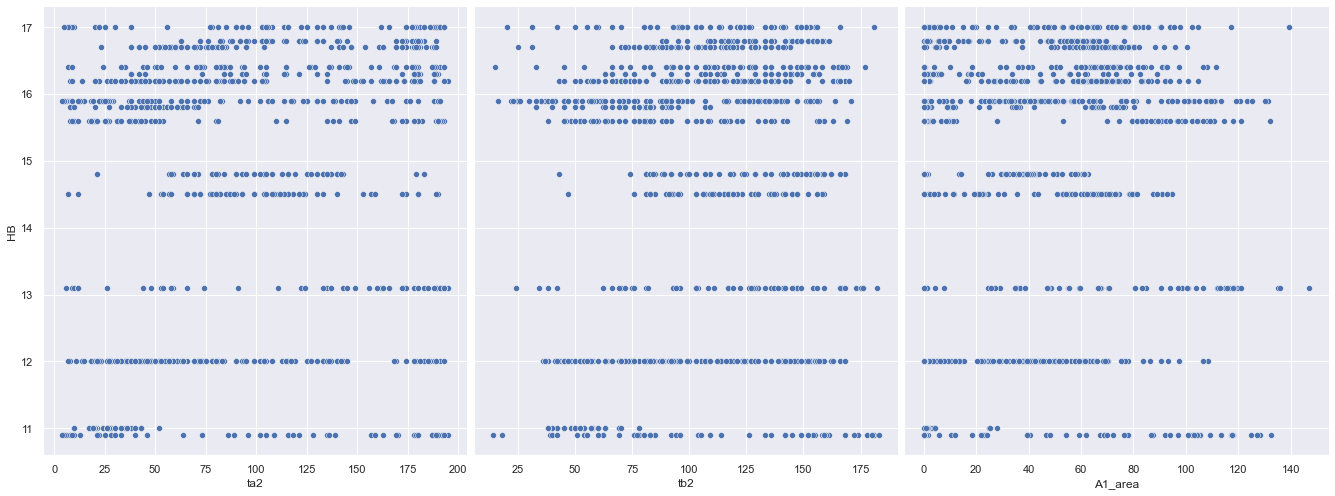

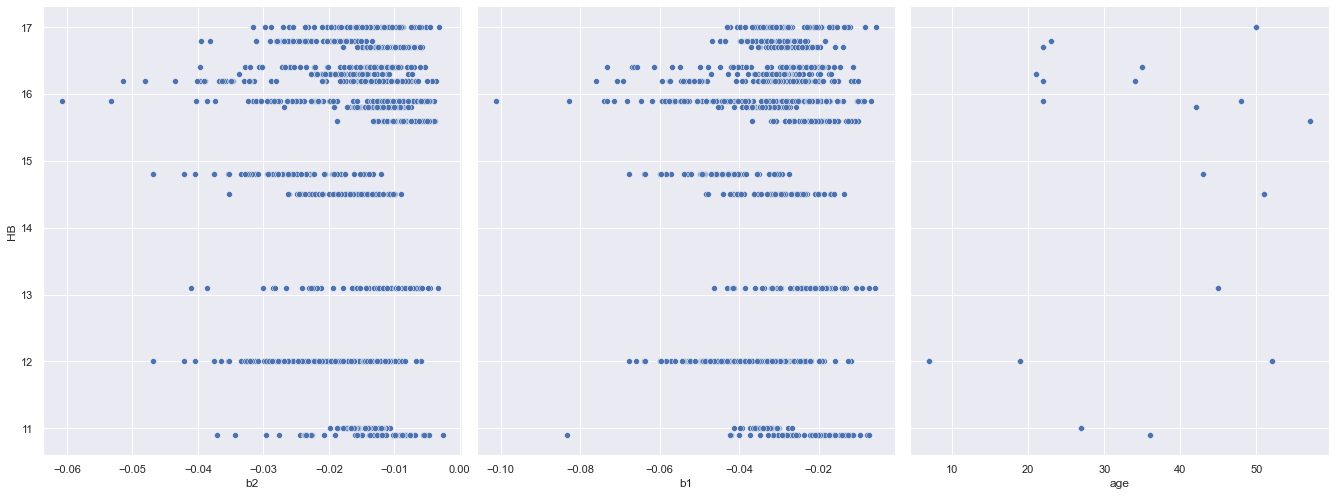

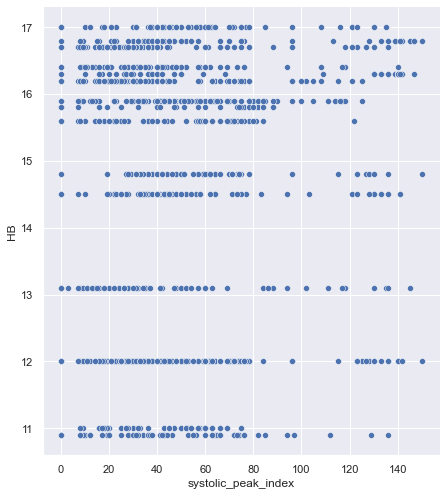

In [42]:
# columns

# plt.rcParams['figure.figsize']=(10,10)
## visualize the relationship between the features and the response using scatterplots
sns.pairplot(final_data, x_vars=columns[:3], y_vars='HB', size=7, aspect=0.9)
sns.pairplot(final_data, x_vars=columns[3:6], y_vars='HB', size=7, aspect=0.9)
sns.pairplot(final_data, x_vars=columns[6:9], y_vars='HB', size=7, aspect=0.9)
sns.pairplot(final_data, x_vars=columns[9:], y_vars='HB', size=7, aspect=0.9)
# g.fig.set_size_inches(15,15)

c:\users\numan98khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


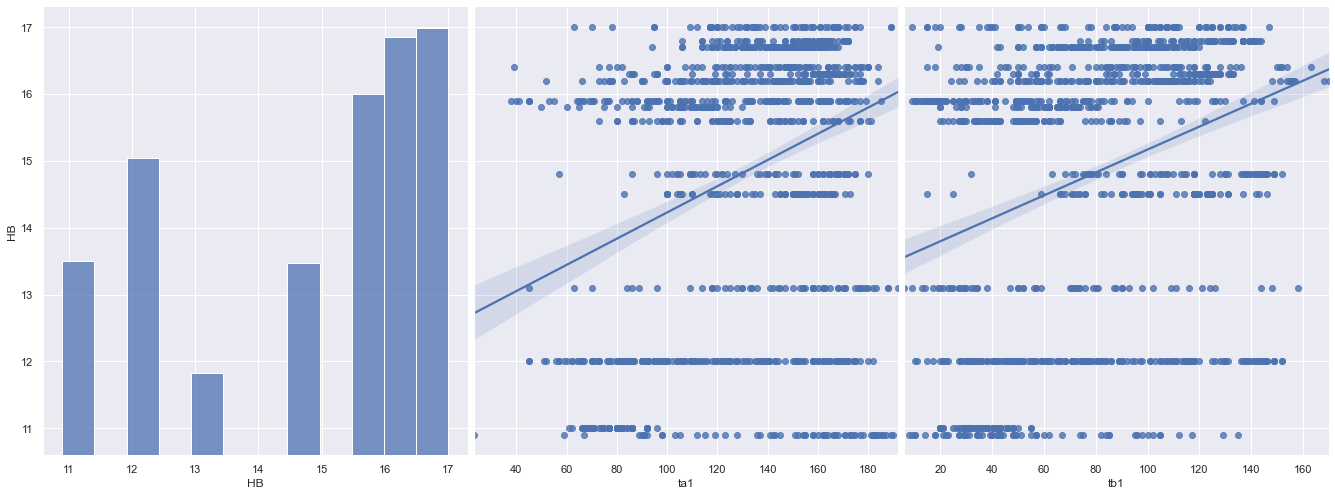

In [43]:
sns.pairplot(final_data, x_vars=columns[:3], y_vars='HB', size=7, aspect=0.9, kind='reg')

## We can see here that linear regression would be a bit inappropriate

In [48]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.20, random_state=42)

    
# X, y = get_dataset()
# define the model
model = HuberRegressor()

## evaluate model
## define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
## evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
## force scores to be positive
results = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

print(results)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : y_test})
# compare.head(10)

display(compare)



Mean MAE: 1.611 (0.102)
[1.60721763 1.63154625 1.44187513 1.55458307 1.53230767 1.60720633
 1.65036965 1.60041816 1.82035058 1.66277243 1.58575091 1.67900345
 1.66138622 1.70272143 1.61509417 1.50529911 1.8153852  1.56299278
 1.42381544 1.52882138 1.77353886 1.62495059 1.6712047  1.68026788
 1.46906587 1.52233867 1.78910729 1.50929338 1.57254656 1.54255319]


c:\users\numan98khan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Prediction,Test Data
0,15.105917,16.8
1,14.567542,16.2
2,14.243124,12.0
3,13.985012,10.9
4,15.410025,13.1
...,...,...
278,14.529931,15.6
279,14.379384,15.6
280,14.404596,10.9
281,13.742487,12.0


In [27]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# define the model
model = RANSACRegressor()

# evaluate model
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
results = absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
## Huber Performed better than ransac


Mean MAE: 1.876 (0.320)


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=21, n_estimators=400)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(Y_test, predictions))

0.08848550971604024


In [36]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
# compare.head(10)

display(compare)

a = compare['Test Data'].unique()
print(sorted(a))

,Prediction,Test Data
0,16.845219,16.8
1,16.292826,16.2
2,12.151306,12.0
3,11.450239,10.9
4,13.023158,13.1
...,...,...
278,15.643304,15.6
279,14.892942,15.6
280,11.940155,10.9
281,11.835519,12.0


[10.9, 11.0, 12.0, 13.1, 14.5, 14.8, 15.6, 15.8, 15.9, 16.2, 16.3, 16.4, 16.7, 16.8, 17.0]


<AxesSubplot:>

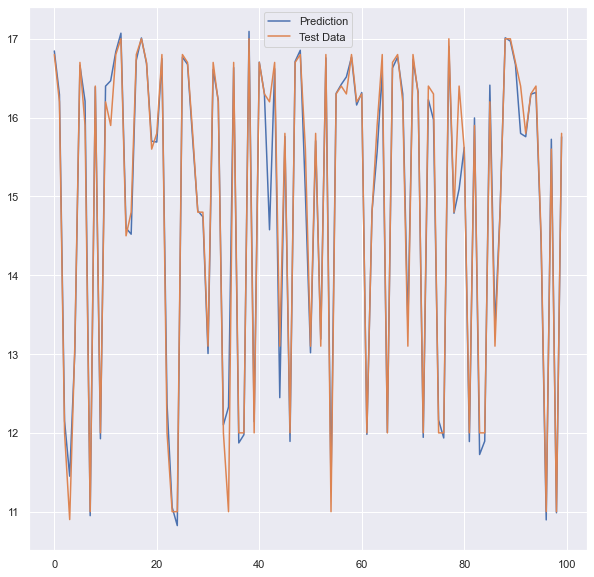

In [40]:
# to_vis = compare.loc[compare['Test Data'] == 10.9]

# to_vis.plot()
compare[:100].plot()
